In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
data = pd.read_csv('HDFCBANK.csv')
data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')
data = data.dropna()

In [5]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4687 entries, 0 to 4693
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4687 non-null   datetime64[ns]
 1   Open    4687 non-null   float64       
 2   High    4687 non-null   float64       
 3   Low     4687 non-null   float64       
 4   Close   4687 non-null   float64       
 5   Volume  4687 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 256.3 KB


In [6]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2005-01-03,51.605000,52.779999,51.605000,52.525002,1295580.0
1,2005-01-04,52.505001,53.099998,50.500000,51.945000,2238060.0
2,2005-01-05,52.000000,52.000000,48.700001,50.005001,3987870.0
3,2005-01-06,50.005001,50.980000,47.900002,48.514999,4829510.0
4,2005-01-07,48.799999,49.375000,48.450001,49.025002,2649000.0


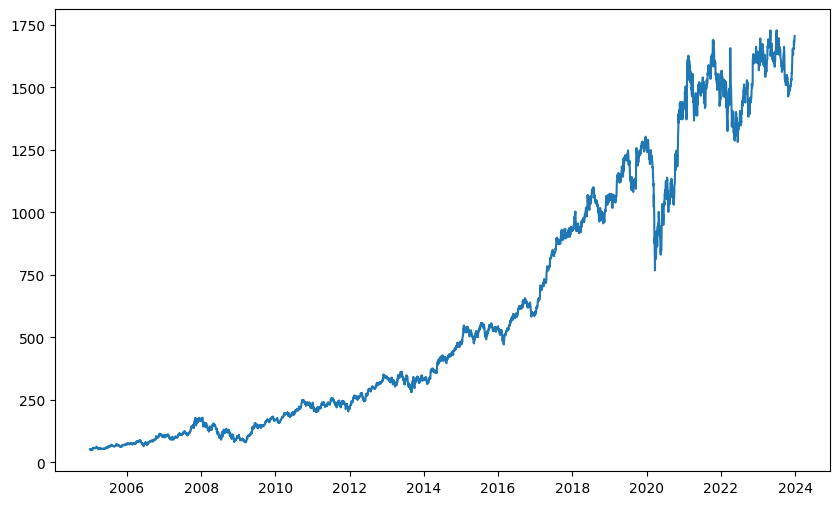

In [7]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'],data['Close'])
plt.show()

In [8]:
len(data)

4687

In [9]:
row = int(len(data)*0.9)
train_data = list(data[:row]['Close'])
test_data = list(data[row:]['Close'])
print(train_data[:10] ,len(train_data))
print(test_data[:10], len(test_data))

[52.525002, 51.945, 50.005001, 48.514999, 49.025002, 48.974998, 48.34, 48.095001, 49.889999, 51.494999] 4218
[1524.0, 1468.150024, 1461.849976, 1497.599976, 1525.099976, 1518.849976, 1473.699951, 1517.800049, 1515.75, 1506.5] 469


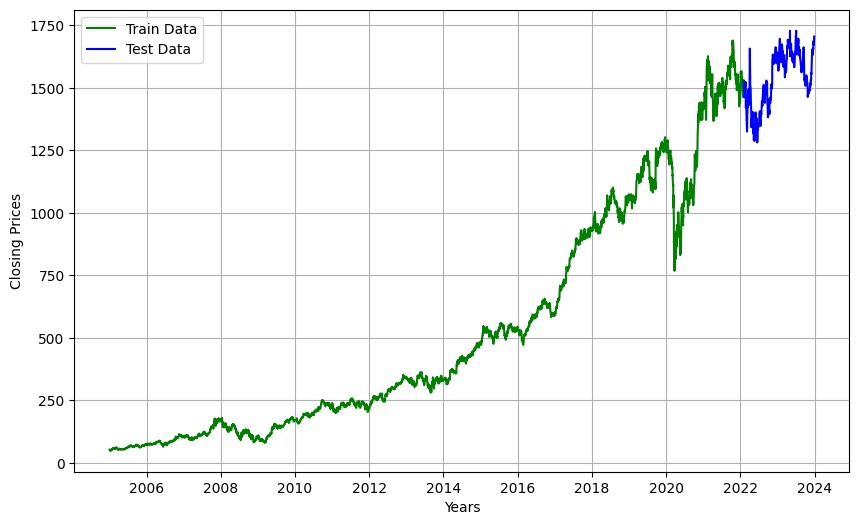

In [10]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Closing Prices')
plt.plot(data[0:row]['Date'],data[0:row]['Close'], 'green', label='Train Data')
plt.plot(data[row:]['Date'],data[row:]['Close'], 'blue', label='Test Data')
plt.legend()

In [11]:
model_predictions = []
n_test_obser = len(test_data)
print(train_data[:10])
print(test_data[:10])

[52.525002, 51.945, 50.005001, 48.514999, 49.025002, 48.974998, 48.34, 48.095001, 49.889999, 51.494999]
[1524.0, 1468.150024, 1461.849976, 1497.599976, 1525.099976, 1518.849976, 1473.699951, 1517.800049, 1515.75, 1506.5]


In [12]:
from pmdarima.arima import auto_arima

# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(data['Close'], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=36347.460, Time=3.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=36395.059, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=36389.362, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=36388.236, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=36397.277, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=36372.842, Time=0.84 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=36371.432, Time=1.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=36351.946, Time=5.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=36372.140, Time=3.71 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=36376.814, Time=1.01 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=36372.565, Time=2.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=36371.456, Time=2.05 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=36360.900, Time=3.54 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=36345.587, Time=2.10 sec
 ARIMA(1,1,2)(0,0,0

In [13]:
for i in range(n_test_obser):
    model = ARIMA(train_data, order=(2, 1, 2))  #p,d,q
    
    model_fit = model.fit()
    output = model_fit.forecast()
    print(output)
    model_predictions.append(output)
    actual_test_value = test_data[i]
    train_data.append(actual_test_value)

[1514.28478179]
[1523.40567288]
[1468.43221339]
[1464.03923527]
[1500.81330424]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1522.44445481]
[1514.4308273]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1473.15146303]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1518.55541472]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1516.78143064]
[1504.44987231]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1509.97327219]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1523.79398987]
[1512.50759723]
[1500.47862746]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1418.66212004]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1458.17776667]
[1426.11146909]
[1368.39854846]
[1373.3173161]
[1367.47416251]
[1325.29587782]
[1324.47068157]
[1369.65500262]
[1393.67587788]
[1395.58070155]
[1441.12902953]
[1423.18135164]
[1449.29167388]
[1482.03960371]
[1484.99811518]
[1492.91098772]
[1479.94315495]
[1443.39400003]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1432.85596573]
[1433.82423054]
[1451.35001273]
[1476.1253663]
[1468.5830557]
[1508.37399403]
[1662.79712059]
[1594.51922545]
[1549.91088353]
[1528.61741299]
[1518.84683495]
[1489.28832395]
[1492.80599409]
[1467.67069433]
[1395.26685977]
[1344.01632184]
[1359.81387811]
[1373.54707509]
[1347.8563998]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1376.20627864]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1373.72888281]
[1362.04161072]
[1374.56531636]
[1392.78832942]
[1398.22174222]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1352.55365497]
[1363.81912035]
[1316.31662026]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1311.71027236]
[1347.21483105]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1352.39271966]
[1299.63561861]
[1294.09672364]
[1308.41140261]
[1307.33993103]
[1310.22932639]
[1286.36834442]
[1325.99472509]
[1300.72565387]
[1318.81157227]
[1329.30796935]
[1367.89330043]
[1389.95325442]
[1399.38556509]
[1388.38513375]
[1397.16103797]
[1384.40166097]
[1379.78200048]
[1379.05084579]
[1362.16318002]
[1368.65854392]
[1378.07746453]
[1348.32934438]
[1327.24616063]
[1314.49341715]
[1308.16806206]
[1279.12926235]
[1291.96531773]
[1324.21928341]
[1333.72160349]
[1327.83059602]
[1337.25806795]
[1355.50628702]
[1353.87837676]
[1344.40745445]
[1345.81203439]
[1349.01587356]
[1352.85360654]
[1354.84998605]
[1352.71741869]
[1372.89837453]
[1395.61099085]
[1394.475985]
[1406.74284595]
[1391.5023911]
[1356.76883428]
[1353.4808025]
[1363.63332317]
[1345.74019699]
[1347.21357481]
[1367.29146968]
[1359.55362547]
[1393.65153988]
[1395.18012759]
[1392.77612051]
[1405.89314934]
[1417.12595807]
[1433.51764248]
[1445.37867747]
[1428.74769871]
[1435.42663376]
[1432.18856425]
[1426.066479

c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1400.31179979]
[1411.12998525]
[1391.90834199]
[1442.02329613]
[1444.46472627]
[1441.74080712]
[1460.70710371]
[1448.18510695]
[1437.77823335]
[1463.29478689]
[1449.10391354]
[1454.27287964]
[1459.53190027]
[1498.46433659]
[1511.00342799]
[1512.26174515]
[1508.23123654]
[1497.98376066]
[1509.85104967]
[1507.07405756]
[1525.18764569]
[1615.56801172]
[1608.9160992]
[1617.21453453]
[1636.53729176]
[1617.00438645]
[1612.42558432]
[1597.33736963]
[1596.40745157]
[1599.43799581]
[1625.64942314]
[1615.32621947]
[1599.65736452]
[1600.0512431]
[1609.39119255]
[1618.29464275]
[1605.24014177]
[1614.79453543]
[1611.46339679]
[1609.6269813]
[1619.93690229]
[1631.46334676]
[1643.45345207]
[1647.51751458]
[1662.92435457]
[1629.50846786]
[1641.91556554]
[1645.51187503]
[1631.30263825]
[1617.21446893]
[1613.84785128]
[1597.33721352]
[1631.31044918]
[1629.08831944]
[1628.76466228]
[1643.00713969]
[1627.10737525]
[1628.8318534]
[1640.38482461]
[1607.6756069]
[1600.71573504]
[1595.94930183]
[1597.5239578

c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1722.63781467]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1725.62305524]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1670.07882574]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1680.04668068]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1660.30358836]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1651.74382943]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1649.78644781]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1636.86910117]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1637.90587546]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1641.93730797]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1682.67901501]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1675.80908297]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1682.55830882]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1691.59453399]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1677.32237136]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1675.86333887]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1698.23031264]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1691.70809681]
[1670.83791503]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1643.34063998]
[1654.38743634]
[1661.80403185]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1637.21148734]
[1629.8755246]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1654.77497449]
[1647.06126132]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1649.75935661]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1654.48294176]
[1635.60764501]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1616.05799842]
[1614.58762875]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1606.73718684]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1593.42924797]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1592.23592783]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1592.36967089]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1579.60117068]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1585.85037993]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1582.22634398]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1560.09472777]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1576.58162845]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1592.40173113]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1578.3140926]
[1569.72239942]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1576.09810937]
[1585.5214339]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1572.37113819]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1596.63442255]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1612.70305669]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1621.40097525]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1631.10633075]
[1639.11987688]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1643.4720451]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1641.02799936]
[1663.86006086]
[1628.40847655]
[1560.43343145]
[1556.50751643]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1530.35900714]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1528.35833084]
[1538.56613262]
[1528.28818543]
[1522.23019523]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1525.88374547]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1508.94175634]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1530.43168827]
[1534.29699649]
[1533.85559742]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1517.09543095]
[1525.14561649]
[1539.04698862]
[1550.0064224]
[1535.57237864]
[1529.54331559]
[1541.87710081]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1518.64015354]
[1515.17558028]
[1524.02033845]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1504.51794201]
[1496.26040233]
[1464.07697694]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1469.95625643]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1484.51385952]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1475.53140736]
[1475.59465266]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1477.16874898]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1482.7531534]
[1494.90500484]
[1487.582793]
[1491.25245129]
[1485.23981688]
[1492.2696148]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1488.61091878]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1504.36660951]
[1508.46662685]
[1504.9068868]
[1505.24014815]
[1518.5329827]
[1511.85188565]
[1521.49755788]
[1532.88278962]
[1527.79079934]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1559.94028662]
[1558.74912724]
[1554.59018368]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1611.62297332]
[1622.97804721]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1625.96760217]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1632.07442985]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1654.76410594]
[1648.2968572]
[1634.0331309]
[1633.79872762]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1649.86282982]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1653.95412028]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1657.16979905]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1654.45376624]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1655.02804515]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1687.28818776]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1671.41387273]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1682.25377125]
[1703.42288253]


c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4686
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -18164.381
Date:                Thu, 16 May 2024   AIC                          36338.761
Time:                        19:01:10   BIC                          36371.022
Sample:                             0   HQIC                         36350.105
                               - 4686                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4828      0.012    -40.942      0.000      -0.506      -0.460
ar.L2         -0.9331      0.010    -90.874      0.000      -0.953      -0.913
ma.L1          0.5168      0.013     40.810      0.0

In [15]:
len(model_predictions)

469

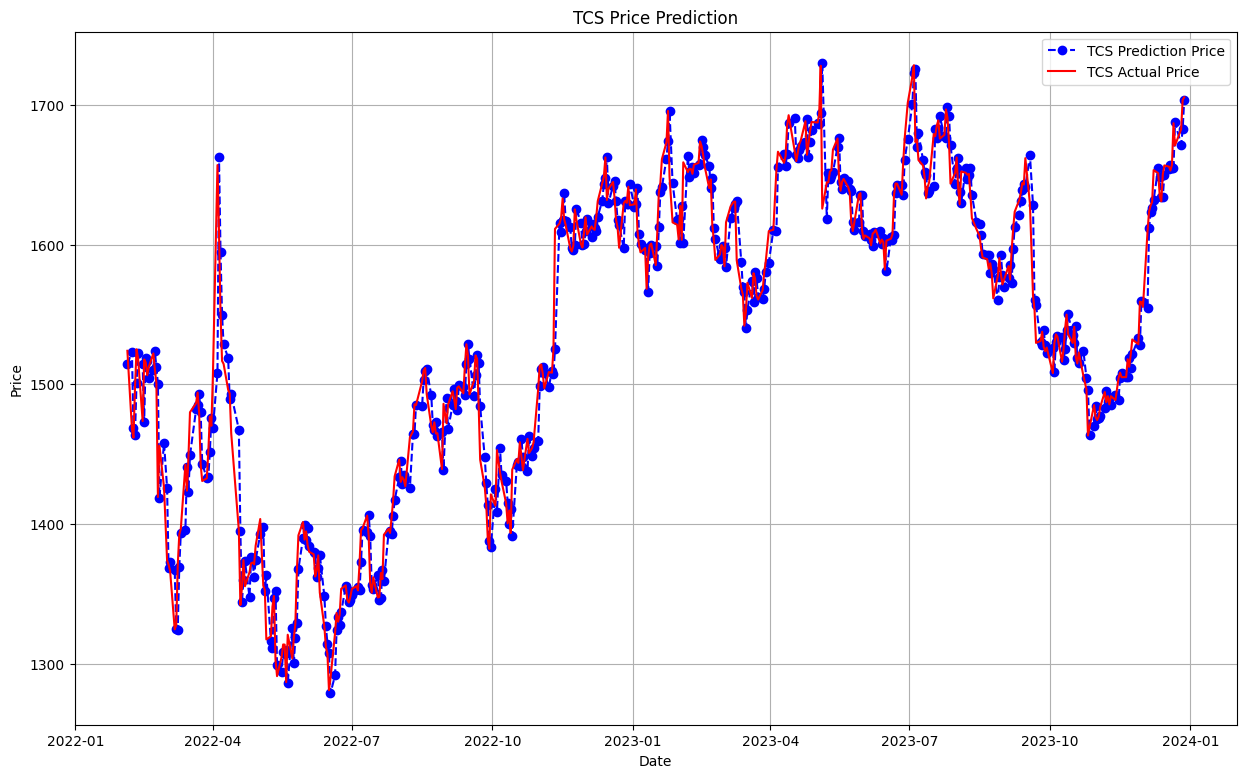

In [16]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = data[row:].Date
plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'TCS Prediction Price')
plt.plot(date_range, test_data, color = 'red', label = 'TCS Actual Price')

plt.title('TCS Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [17]:
mape = np.mean(np.abs(np.array(model_predictions) - np.array(test_data))/np.abs(test_data))
print('MAPE: ',(mape))
print('Accuracy: ', (100-(mape*100)))

MAPE:  0.0833156260155292
Accuracy:  91.66843739844708
